# Generate MultiVariate dataset

In [152]:
import numpy as np
import pandas as pd
import torch
from torch import nn


torch.manual_seed(42) # For reproducibility

# n data points , m-1 features
def generate_dataset(n,m,noise_factor=0):
    X = torch.rand(n,m-1)
    hiddens = torch.rand(m-1,1)
    noise = torch.rand(n,1) * noise_factor
    y=X @ hiddens + noise

    return X, y , hiddens


X, y , hiddens = generate_dataset(100,5)

print(f"X shape {X.shape} y shape {y.shape} hiddens shape {hiddens.shape}")

X shape torch.Size([100, 4]) y shape torch.Size([100, 1]) hiddens shape torch.Size([4, 1])


# Analyse the dataset 

Now that we have dataset ready . x1,x2,x3,x4 are four columns which has some kind of relationship that results in y . We will plot / analyze the data to understand if there exits any underlying relation ships

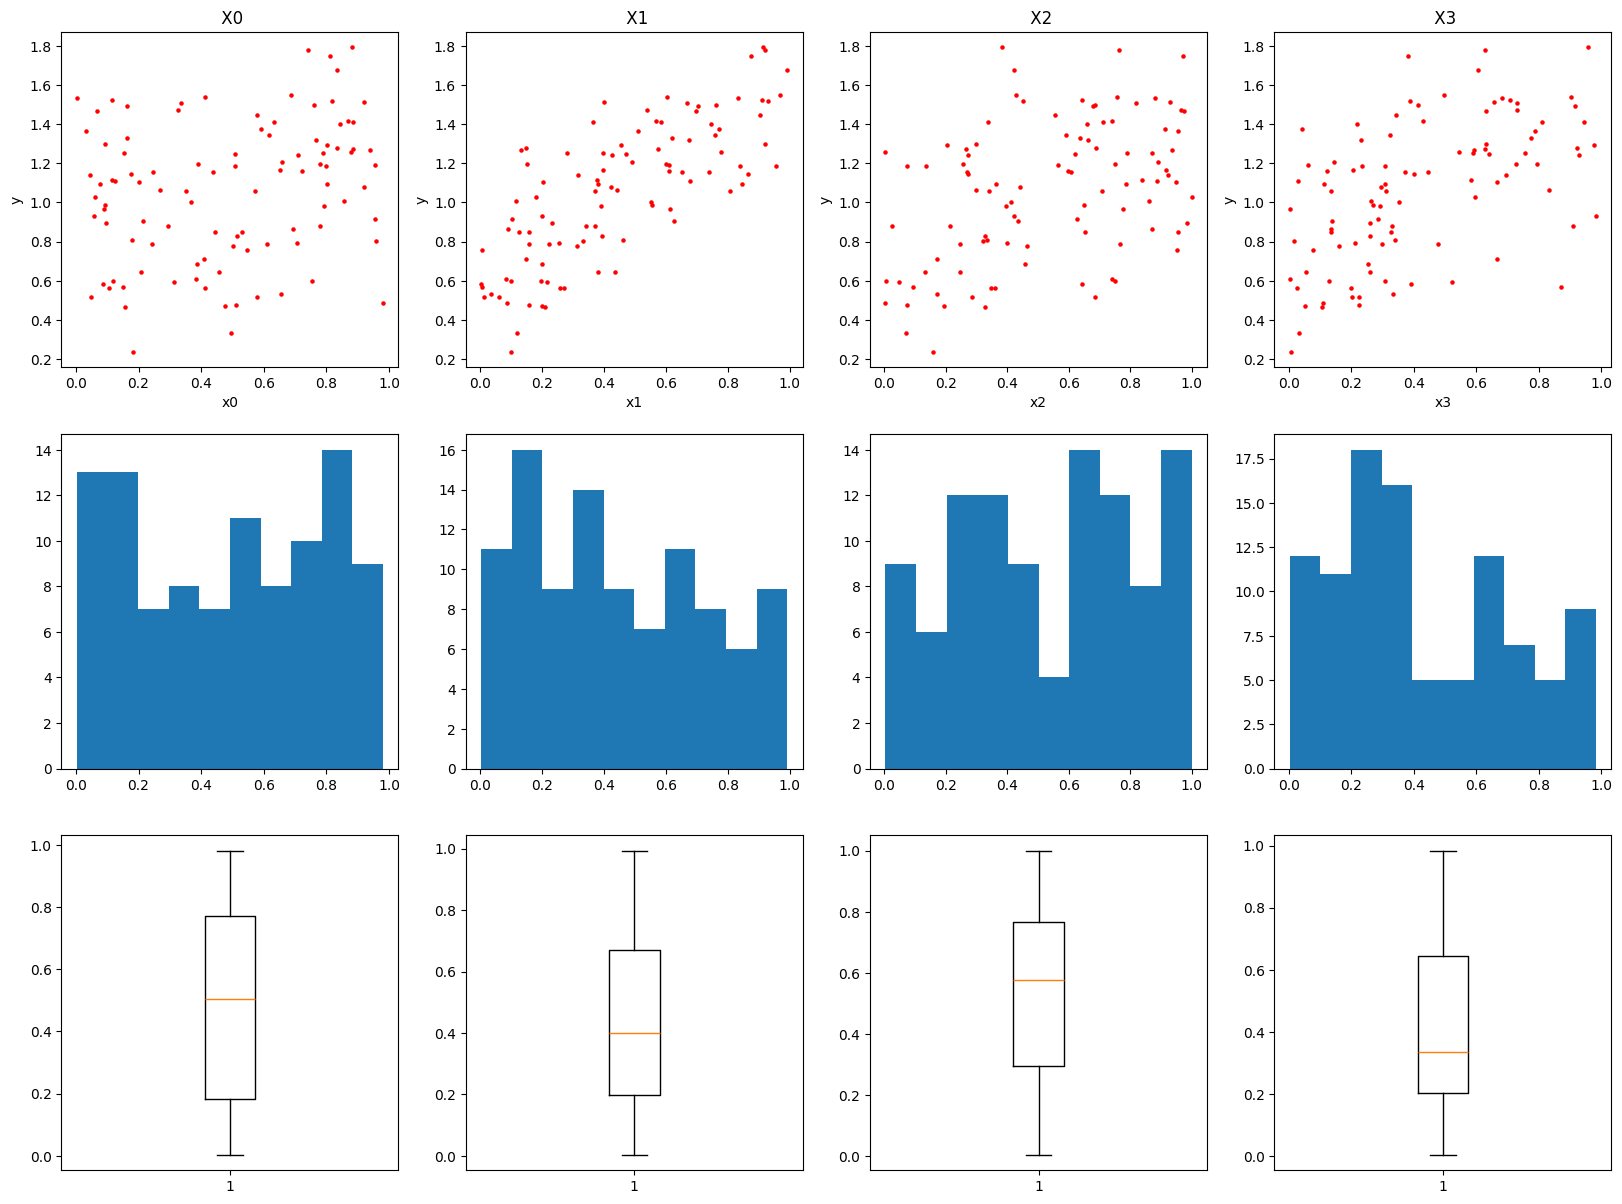

In [153]:

import matplotlib.pyplot as plt


plt.figure(figsize=(20,20))


def plot_features_relationships(X,y):
    n_sample ,n_features = X.shape
    for i in range(n_features):

        plt.subplot(n_features,n_features,i+1)
        plt.title(f' X{i}')
        plt.ylabel('y')
        plt.xlabel(f'x{i}')
        plt.scatter(X[:,i],y,s=5,c='r')

        plt.subplot(n_features,n_features,i+1+n_features)
        plt.hist(X[:,i])


        plt.subplot(n_features,n_features,i+1+(2*n_features))
        plt.boxplot(X[:,i])



plot_features_relationships(X,y)



# Model & Training 

Now that we have visualized our data and saw it is normalized and few params show linear relationship with y. hence we will define a linear model 

In [154]:
n_sample ,n_features = X.shape

model = nn.Sequential(nn.Linear(n_features,1))
print(f"model ---> \n {model}")

print(f"model dictionary ---> \n {model.state_dict()}")


model ---> 
 Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)
model dictionary ---> 
 OrderedDict([('0.weight', tensor([[ 0.3910,  0.2296, -0.3680, -0.2684]])), ('0.bias', tensor([-0.1099]))])


epoch 0 loss : 1.5671603679656982
epoch 1000 loss : 0.05806754156947136
epoch 2000 loss : 0.041355784982442856
epoch 3000 loss : 0.03011118620634079
epoch 4000 loss : 0.022186554968357086
("learnt params OrderedDict([('0.weight', tensor([[0.4066, 0.6691, 0.2565, "
 "0.2773]])), ('0.bias', tensor([0.3211]))]) \n"
 ' hidden : tensor([[0.3601],\n'
 '        [0.8377],\n'
 '        [0.5398],\n'
 '        [0.5226]]) ')


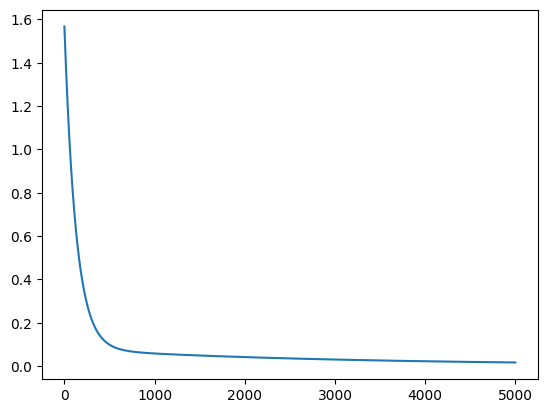

In [155]:
from pprint import pprint

criteria = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

epochs=5000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() #zero grad , reset for each iteration
    output = model(X)
    loss=criteria(output,y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 1000 == 0:
        print(f"epoch {epoch} loss : {loss.item()}")



pprint(f"learnt params {model.state_dict()} \n hidden : {hiddens} ")

plt.plot(losses)

# FUN FACT : JUST KEEP RUNNING THIS CELL AGAIN AND AGAIN
    